In [1]:
# ### Question:--HUIMIN
# - For investors, the **amortization process** returns the partial principal and 
# monthly interest in a single montly installment payment.
# - Because the borrower can pre-pay the principal at-will or go belly-up (delinquent or default) at any
# moment within the loan term, it may shorten the loan duration un-expectedly or
# cause losses to the investors.
# - Thus it is vital for the investors to know the general pattern of loan-prepayment
# or delinquency (early stage leading to default or eventual charged off).
# - Please compute the actual durations of loans (last_payment_date - issuance_date)
# and 
#     - analyze the pattern debtors terminate the loans before loan maturity 
#     (either 'fully paid', or stop paying henceforth).
#     - Please include 'term', 'loan-grade/sub-grade' in your analysis.
# - Do you see major differences on the patterns with different loan-terms? 
# What is the rational explanation for this difference?

# - Report the major characteristics of the patterns. 
# - Do '60 months' (5 years) loans often get terminated at the end of the 5 years
# loan term? Why not?
    
    

In [26]:
import pandas as pd
import numpy as np

In [3]:

df_raw = pd.read_csv('accepted_2007_to_2016.csv.gz')

C:\Users\Laptop2\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (18,46,54) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df_raw.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [6]:
df_raw.columns.to_list()

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 '

In [7]:
len(df_raw.member_id.unique())

1321847

In [8]:
df_raw.shape

(1321847, 110)

In [18]:
#Get a subset of data for easy computation. 
df_raw_sample=df_raw.sample(3000)

In [19]:
df_raw_sample.shape

(3000, 110)

In [21]:
#change issue date and last payment date column data types to date
df_raw_sample['issue_d']=pd.to_datetime(df_raw_sample['issue_d'])
df_raw_sample['last_pymnt_d']=pd.to_datetime(df_raw_sample['last_pymnt_d'])

In [56]:
#calculate duration of loan
df_raw_sample['duration_of_loan_months'] = ((df_raw_sample.last_pymnt_d - df_raw_sample.issue_d)/np.timedelta64(1, 'M'))
df_raw_sample['duration_of_loan_months'] = df_raw_sample['duration_of_loan'].astype(int)


In [57]:
#Drop 16 rows. Missing data on the "last payment date"
df_raw_sample=df_raw_sample.dropna(subset=['last_pymnt_d', 'issue_d', "duration_of_loan"])

In [58]:
df_raw_sample.shape

(2984, 114)

In [65]:
#df_raw_sample['term'].str.extract('(\d+)').astype(int)

In [60]:
df_raw_sample[['term',"loan_status","duration_of_loan_months","grade", "sub_grade" ]].sample(20)

,term,loan_status,duration_of_loan_months,grade,sub_grade
705977,36 months,Current,27,C,C5
286963,36 months,Current,13,C,C2
1313360,60 months,Current,3,A,A5
1246740,36 months,Current,1,A,A1
1068619,36 months,Current,8,B,B4
316201,60 months,Charged Off,8,C,C4
744207,36 months,Fully Paid,7,B,B3
984902,60 months,Current,11,F,F3
37966,36 months,Fully Paid,15,B,B5
141813,36 months,Charged Off,9,C,C3


In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

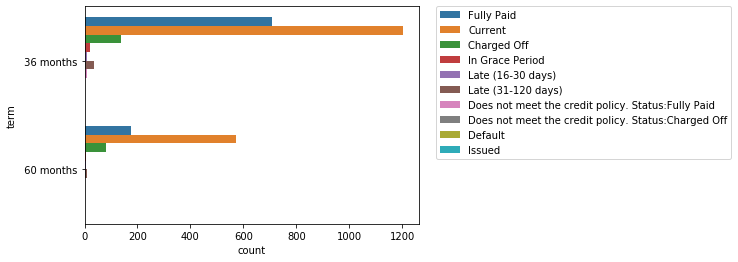

In [79]:
 sns.countplot(y="term", hue="loan_status", data=df_raw_sample)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

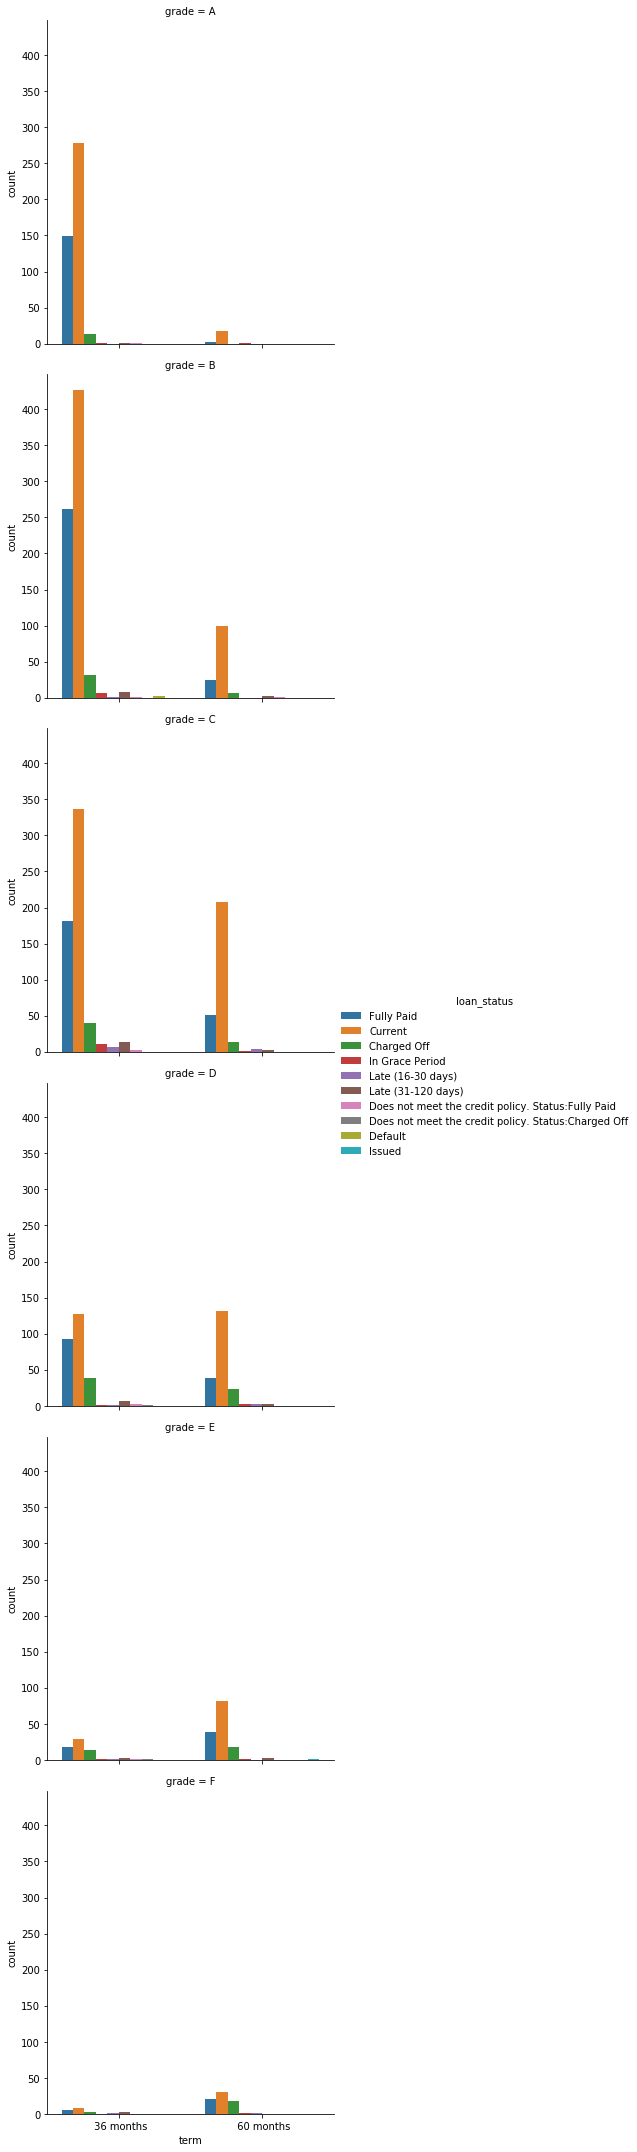

In [93]:
 sns.catplot(x="term", hue="loan_status", row="grade",row_order=['A','B',"C",'D','E','F'], data=df_raw_sample, kind='count')


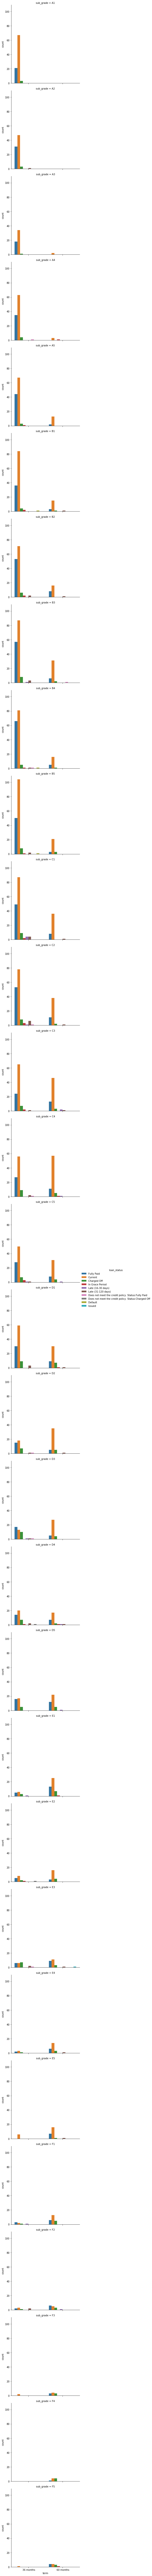

In [95]:
 sns.catplot(x="term", hue="loan_status", 
             row="sub_grade", 
             row_order=['A1','A2','A3','A4','A5',
                        'B1','B2',"B3",'B4','B5','C1',
                        'C2','C3','C4','C5','D1','D2',
                        'D3','D4','D5','E1','E2','E3',
                        'E4','E5','F1','F2','F3','F4',
                        'F5'], 
             data=df_raw_sample, kind='count')


[Text(0, 0, 'Fully Paid'),
 Text(0, 0, 'Current'),
 Text(0, 0, 'Charged Off'),
 Text(0, 0, 'In Grace Period'),
 Text(0, 0, 'Late (16-30 days)'),
 Text(0, 0, 'Late (31-120 days)'),
 Text(0, 0, 'Does not meet the credit policy. Status:Fully Paid'),
 Text(0, 0, 'Does not meet the credit policy. Status:Charged Off'),
 Text(0, 0, 'Default'),
 Text(0, 0, 'Issued')]

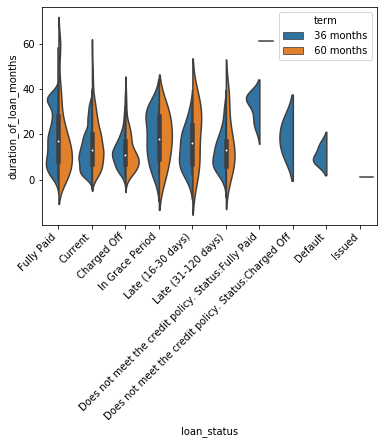

In [107]:
chart=sns.violinplot(x="loan_status", y="duration_of_loan_months", hue="term", data=df_raw_sample, split=True)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')